<a href="https://colab.research.google.com/github/kevinmcaleer/radar_ml_model/blob/main/Model_Trainer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pima = pd.read_csv("diabetes.csv")


In [ ]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
feature_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness', 'Insulin','BMI','DiabetesPedigreeFunction','Age']

In [ ]:
Xraw = pima[feature_cols] # Features
y = pima.Outcome # Target variable

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X = scaler.fit_transform(Xraw)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.05, random_state=0)
print(y_test)

Epoch 1/500
23/23 [==============================] - 1s 8ms/step - loss: 0.7908 - accuracy: 0.3731 - val_loss: 0.7739 - val_accuracy: 0.3077
Epoch 2/500
23/23 [==============================] - 0s 2ms/step - loss: 0.7627 - accuracy: 0.3855 - val_loss: 0.7467 - val_accuracy: 0.3846
Epoch 3/500
23/23 [==============================] - 0s 2ms/step - loss: 0.7399 - accuracy: 0.4129 - val_loss: 0.7246 - val_accuracy: 0.4872
Epoch 4/500
23/23 [==============================] - 0s 2ms/step - loss: 0.7211 - accuracy: 0.4486 - val_loss: 0.7067 - val_accuracy: 0.5385
Epoch 5/500
23/23 [==============================] - 0s 2ms/step - loss: 0.7064 - accuracy: 0.5007 - val_loss: 0.6916 - val_accuracy: 0.5897
Epoch 6/500
23/23 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.5350 - val_loss: 0.6797 - val_accuracy: 0.5897
Epoch 7/500
23/23 [==============================] - 0s 2ms/step - loss: 0.6857 - accuracy: 0.5830 - val_loss: 0.6699 - val_accuracy: 0.6667
Epoch 8/500
2

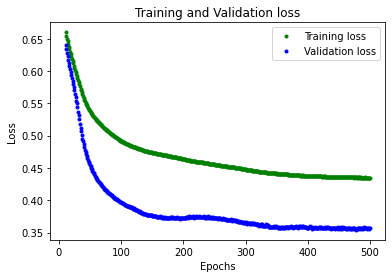

In [ ]:
model = tf.keras.Sequential()
model.add(keras.layers.Dense(4, activation='relu', input_shape=(8,)))
model.add(keras.layers.Dense(2, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_1 = model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test))

loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
epochs = range(1, len(loss) + 1)
SKIP = 10
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
weights = model.get_weights()
print(weights)

In [ ]:
# Saving the array in a text file
file = open('hyper_param.txt', 'w+')
content = str(weights)
file.write(content)
file.close()

In [ ]:
p_pred = model.predict(X_test)
p_pred = p_pred.flatten()
print(p_pred.round(2))

In [ ]:
y_pred = np.where(p_pred > 0.5, 1, 0)
print(y_pred)

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[26,  2],
       [ 2,  9]])